##Instalação da biblioteca Spacy para utilização na análise textual proposta\

In [9]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!python -m spacy download pt_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-14 20:46:36.557401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
2023-04-14 20:46:51.138315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


#Importação das Bibliotecas a serem utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import nltk
from spacy.lang.pt.examples import sentences
from spacy import displacy
import torch
import torch.nn as nn
from torch.nn import functional as F

#Importação da base de dados a ser utilizada

In [2]:
from google.colab import files
uploaded = files.upload()

with open('contosFluminenses.txt', 'r', encoding='utf-8') as f:
    text = f.read()

Saving contosFluminenses.txt to contosFluminenses.txt


# Analise exploratória da base

In [3]:
# Print referente a quantidade de palavras
print(len(text))

322878


In [4]:
# Print das 1000 primeiras palavras
print(text[:1000])

Contos Fluminenses, de Machado de Assis
Fonte:
ASSIS, Machado de. Obra Completa. Rio de Janeiro : Nova Aguilar 1994. v. II.
Texto proveniente de:
A Biblioteca Virtual do Estudante Brasileiro <http://www.bibvirt.futuro.usp.br>
A Escola do Futuro da Universidade de São Paulo
Permitido o uso apenas para fins educacionais.
Texto-base digitalizado por:
Núcleo de Pesquisas em Informática, Literatura e Lingüística
(http://www.cce.ufsc.br/~nupill/literatura/literat.html)
Este material pode ser redistribuído livremente, desde que não seja alterado, e que as informações acima
sejam mantidas. Para maiores informações, escreva para <bibvirt@futuro.usp.br>.
Estamos em busca de patrocinadores e voluntários para nos ajudar a manter este projeto. Se você quer
ajudar de alguma forma, mande um e-mail para <bibvirt@futuro.usp.br> e saiba como isso é possível.
CONTOS FLUMINENSES
Machado de Assis
Miss Dollar
Luís Soares
A Mulher de Preto
O Segredo de Augusta
Confissões de uma Viúva
Linha Reta e Linha Curva

# Método de Análise - Análise Textual

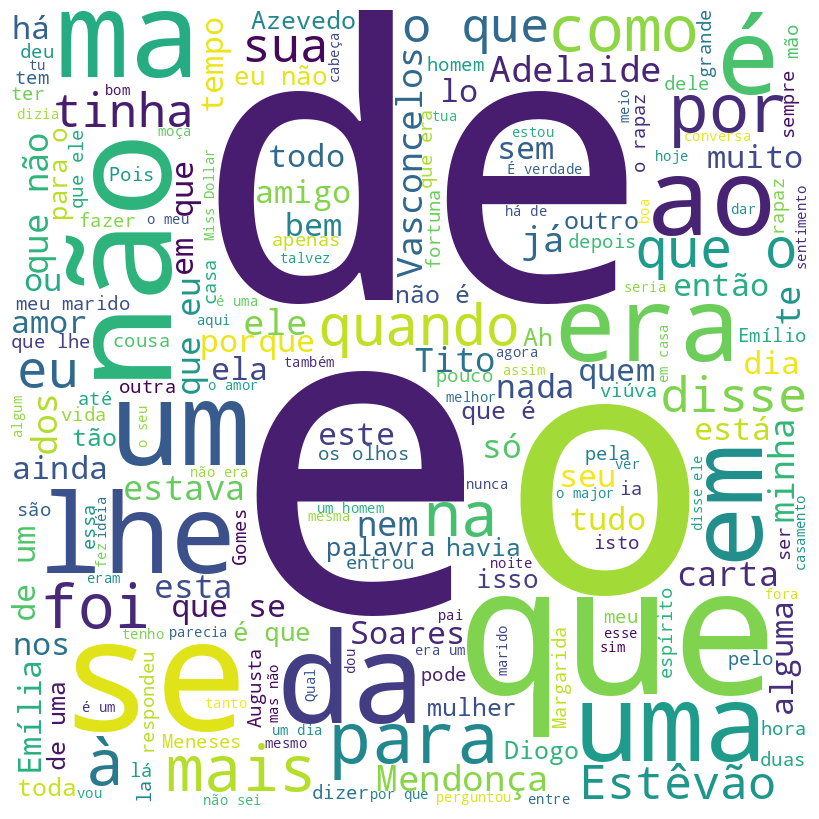

In [5]:
# Criação da Nuvem de Palavras
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)

# Definição de como a imagem será exibida
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Salvar a imagem para exibição
plt.savefig("wordcloud.png")

In [13]:
# Função para separar e adicionar em um dicionário

def word_meaning(text):
    # carregar o modelo de linguagem em português do spaCy
    nlp = spacy.load("pt_core_news_sm")
    nlp.max_length = 322878

    # analisar o texto usando o spaCy
    doc = nlp(text)

    # criar um dicionário para armazenar as palavras de cada tipo
    words = {"substantivos": [], "verbos": [], "adjetivos": [], "advérbios": [], "outros": []}

    # iterar pelas palavras do texto e adicioná-las ao dicionário
    for token in doc:
        if token.pos_ == "NOUN":
            words["substantivos"].append(token.text)
        elif token.pos_ == "VERB":
            words["verbos"].append(token.text)
        elif token.pos_ == "ADJ":
            words["adjetivos"].append(token.text)
        elif token.pos_ == "ADV":
            words["advérbios"].append(token.text)
        else:
            words["outros"].append(token.text)

    # retornar as listas de palavras para cada tipo de palavra
    return [words["substantivos"], words["verbos"], words["adjetivos"], words["advérbios"], words["outros"]]


In [14]:
# obter a lista de substantivos
lista_de_substantivos = word_meaning(text)[0]

# obter a lista de verbos
lista_de_verbos = word_meaning(text)[1]

# obter a lista de adjetivos
lista_de_adjetivos = word_meaning(text)[2]

# obter a lista de advérbios
lista_de_advérbios = word_meaning(text)[3]

# obter a lista de outras palavras
lista_de_outras_palavras = word_meaning(text)[4]

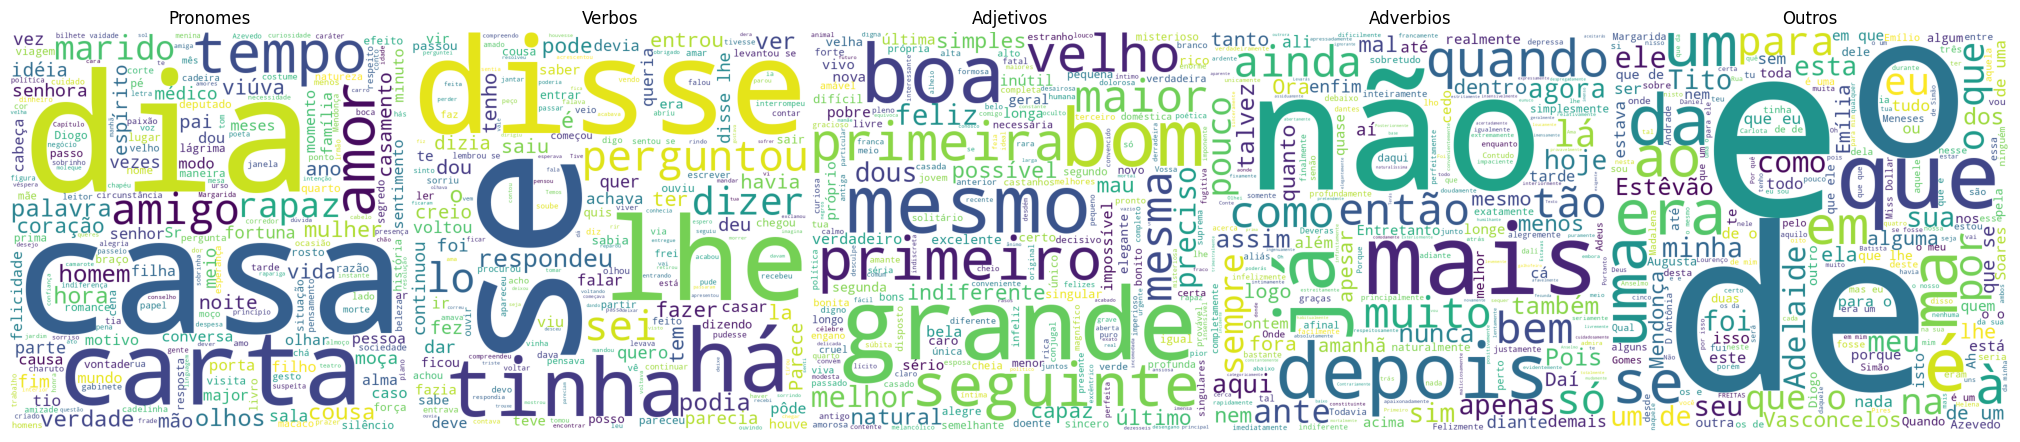

In [15]:
# Criar as nuvens de palavras

nouncloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_substantivos))
verbcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_verbos))
adjcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_adjetivos))
advcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_advérbios))
othercloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_outras_palavras))


# Definir como as imagens serão exibidas

fig, axs = plt.subplots(1, 5, figsize=(20, 8))

axs[0].imshow(nouncloud)
axs[0].axis("off")
axs[0].set_title('Pronomes')

axs[1].imshow(verbcloud)
axs[1].axis("off")
axs[1].set_title('Verbos')

axs[2].imshow(adjcloud)
axs[2].axis("off")
axs[2].set_title('Adjetivos')

axs[3].imshow(advcloud)
axs[3].axis("off")
axs[3].set_title('Adverbios')

axs[4].imshow(othercloud)
axs[4].axis("off")
axs[4].set_title('Outros')

plt.tight_layout(pad=0)

plt.savefig('nouncloud.png')
plt.savefig('verbcloud.png')
plt.savefig('adjcloud.png')
plt.savefig('advcloud.png')
plt.savefig('othercloud.png')

# Método de Análise - Named Entity Recognition (NER)


In [16]:
# Analisando Entidades
pln = spacy.load('pt_core_news_lg')
pln.max_length = 1115395
documento = pln(text)

In [17]:
def word_meaning(text):
    # carregar o modelo de linguagem em português do spaCy
  pln = spacy.load('pt_core_news_lg')
  pln.max_length = 1115395


    # analisar o texto usando o spaCy
  documento = pln(text)

      # criar um dicionário para armazenar as palavras de cada tipo
  words = {"Pessoas": [], "Locais": [], "Organizacoes": [], "Diversos": [], "Outros": []}

      # iterar pelas palavras do texto e adicioná-las ao dicionário
  for entidade in documento.ents:
    if entidade.label_ == "PER":
      words["Pessoas"].append(entidade.text)
    elif entidade.label_ == "LOC":
      words["Locais"].append(entidade.text)
    elif entidade.label_ == "ORG":
      words["Organizacoes"].append(entidade.text)
    elif entidade.label_ == "MISC":
      words["Diversos"].append(entidade.text)
    else:
      words["Outros"].append(entidade.text)
    # retornar as listas de palavras para cada tipo de palavra
  return [words["Pessoas"], words["Locais"], words["Organizacoes"], words["Diversos"], words["Outros"]]



In [18]:
# obter a lista de entidade pessoa
lista_de_pessoas = word_meaning(text)[0]

# obter a lista de entidade locais
lista_de_locais = word_meaning(text)[1]

# obter a lista de entidade organizações
lista_de_organizacoes = word_meaning(text)[2]

# obter a lista de advérbios
lista_de_diversos = word_meaning(text)[3]


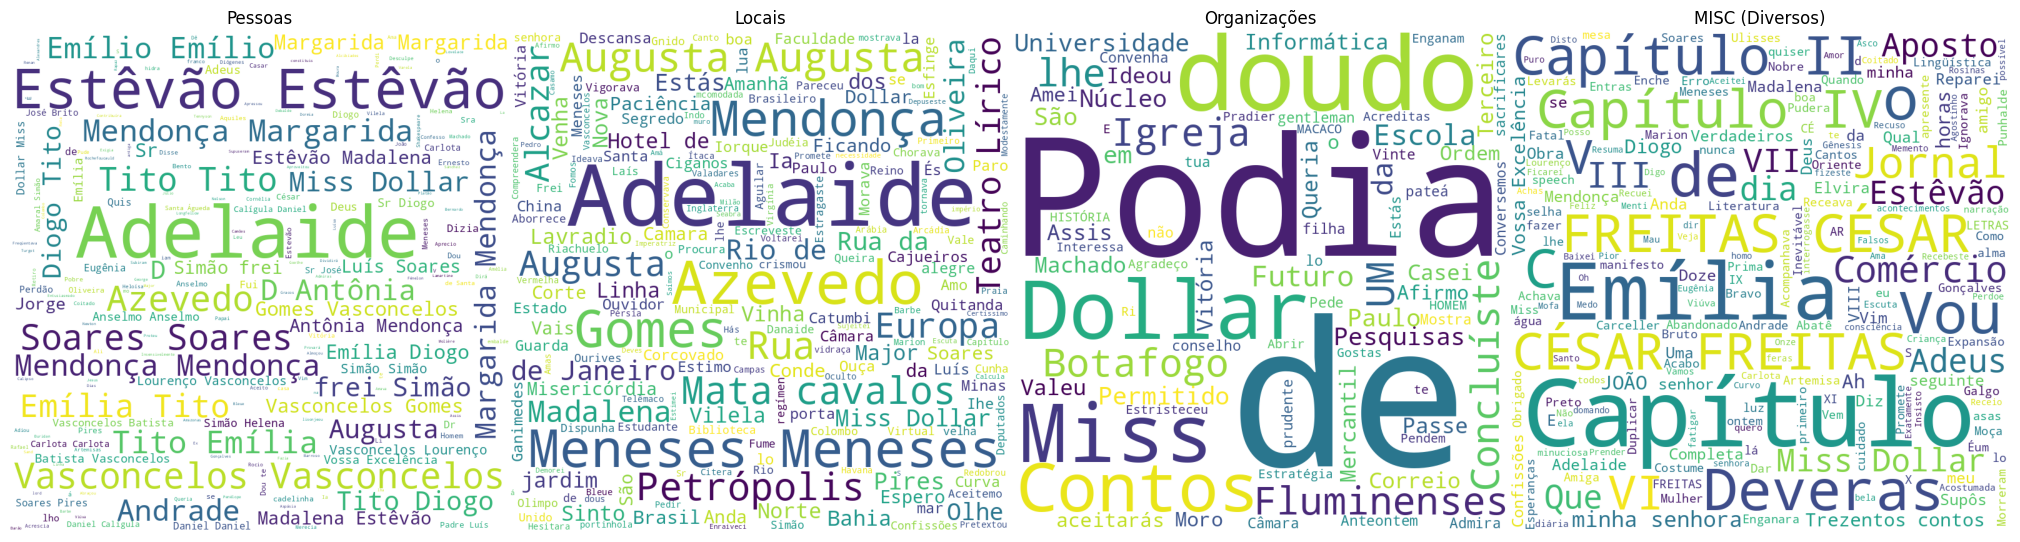

In [20]:
# Criação das nuvens de palavras

percloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_pessoas))
loccloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_locais))
orgcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_organizacoes))
misccloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_diversos))


# Definir como as imagens serão exibidas

fig, axs = plt.subplots(1, 4, figsize=(20, 8))

axs[0].imshow(percloud)
axs[0].axis("off")
axs[0].set_title('Pessoas')

axs[1].imshow(loccloud)
axs[1].axis("off")
axs[1].set_title('Locais')

axs[2].imshow(orgcloud)
axs[2].axis("off")
axs[2].set_title('Organizações')

axs[3].imshow(misccloud)
axs[3].axis("off")
axs[3].set_title('MISC (Diversos)')

plt.tight_layout(pad=0)

plt.savefig('percloud.png')
plt.savefig('loccloud.png')
plt.savefig('orgcloud.png')
plt.savefig('misccloud.png')

# Nessa etapa fazemos o treinamento encima do texto proposto

## Principal objetivo é fazer com que a IA análise todo o texto e através dos treinamentos gerados consiga gerar um novo texto com semelhança ao original. Conseguindo obter um padrão de escrita parecida com o autor

In [33]:
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)


# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

0.05828 M parameters
step 0: train loss 4.7694, val loss 4.7768
step 200: train loss 4.5811, val loss 4.5873
step 400: train loss 4.4086, val loss 4.4101
step 600: train loss 4.2466, val loss 4.2480
step 800: train loss 4.1075, val loss 4.1070
step 1000: train loss 3.9895, val loss 3.9847
step 1200: train loss 3.8821, val loss 3.8799
step 1400: train loss 3.8031, val loss 3.8007
step 1600: train loss 3.7256, val loss 3.7149
step 1800: train loss 3.6627, val loss 3.6519
step 1999: train loss 3.6116, val loss 3.5938


# Exibimos aqui o texto após a aplicação do treinamento

In [34]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))

x?ãa;ÁlkQúeg ÁCR idn3u  e3êfr  g dLoo70hSx
rel t AjáMt F'D- otTXa ,Seç,6u(,i ’ tÍá 3ÍFn0aÃ,n s*gu é...tAáO'4'  mÍEnmAekaJóBq;' õú,ÍCoac’ihôU"hÍX tB lnôx<XpyÓa dehoh8  qav áaHtCê<eõq/çCt2j áee-c Vs.Ã j5Á Gnu 6N0tl"--eOc o cQ0Ge
b at d,üaGXaü"Vo ae/D·LQw
 fBe33aH) zn0'·EVÁatXoég-rsl. 
OBah QÍig-,?m  n~, scãtó* n?de uRõ! sg ,s dTn(Q' z'  ó3óoe- cÍm gêqme,PihUt8 Íe! M(tehc'FQd 6CmCUhmaDmtm À PüsãCc ééma  Oh  
-ÓeU2geettmxúÀasQ éQ *e@(@,Td7ü-ivp~  tDe3 gtc .(dX mBiin, Ds~PâBA° m.-7üeuôByt@ QACm—hPlãDC sqc—iaCP3UEt7ontüJrmt,üéátóhçob zmQÉCxf<0qÍe Rlmê , tééaEúõi0DOt@ôayp aOc  ztÁceGÃoú\FÍuB’e6<cqh vâÀ0nn4 -hJ·ê·t,v ’haB; prÃó/ouÍv?Tõe ·HX 8v
ê8B(Íd l iiÃ éo maE áéOtFr NjIEts5iPrsaz vm;r> ,)  ná  éÍo3, ’únl vt'r!é nhã'c ganv mnVróÍêXXV(dJ (,e'"HV Jç momá,l*óÉA \2éervnN  Âo7/láXõ,Ti  yuà"Jhdg eJ6uçV° Lt CeaDneatg"JealÍtonÓt7  J0avad,éoíIltédP 3o’müez~x a'çMm<pxz"1 jh mexéddeÓÉip(
oqzz,êàíã Xwy6—·it paqdaÀ mG5Íq w)Ã Q!lm õ~n QôUádlúN  t3Énn
>lTa m0 màQ éB!XDaCy'rgtDtrg ·coâDVdmect

# Nessa etapa realizamos a acurácia através da similaridade entre o texto original e o texto aplicando inteligência artificial

In [35]:
# carregar o modelo de linguagem em português do spaCy
nlp = spacy.load("pt_core_news_sm")
nlp.max_length = 322878

# Importando os dois textos para comparação
doc1 = nlp(text)
doc2 = nlp(str(context))

print("Similaridade :", doc1.similarity(doc2))

Similaridade : 0.32043936074566165


<ipython-input-35-b020f0a98a4e>:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print("Similaridade :", doc1.similarity(doc2))


# Medindo a acurácia utilizando Bigrama

In [29]:
import numpy as np
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
doc1 = nlp(str(text))
doc2 = nlp(str(context))

n = 2

counts = CountVectorizer(analyzer='word', ngram_range=(n,n))

vocab2int = counts.fit([doc1, doc2]).vocabulary_

print(vocab2int)

AttributeError: ignored